In [2]:
# R_it-R_ft=\alpha_i+b_i(R_mt-R_ft)+s_i SMB_t+h_i HML_t+\epsilon_it
# R_it, R_mt are extracted from data bases
# R_ft can refer to official bonds
# SMB_t: sort companies by their market value, below median means small value
# HML_t: sort companies by their B/M value, the biggest 30% means high, the smallest 30% means low
# so we can get 6 groups of portfolios and then compute mean return of every group
# weight is chosen to be the proportion of market value
# SMB_t=1/3(SL_t+SM_t+SH_t)-1/3(BL_t+BM_t+BH_t)
# HML_t=1/2(SL_t+BL_t)-1/2(SH_t+BH_t)
# sometimes we can download and use the factors above

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
stock=pd.read_table('stock.txt',sep='\t',index_col='Trddt')
stock.head(n=3)

,Stkcd,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Dretwd,Dretnd,Adjprcwd,Adjprcnd,Markettype,Capchgdt,Trdsta
Trddt,,,,,,,,,,,,,,,,
2014/3/19,2599,14.15,14.30,13.50,13.73,2364472,32498977.36,576660.0,1812360.0,-0.028996,-0.028996,14.016574,13.729988,4,2012/7/16,1
2014/3/20,2599,13.68,13.79,12.86,12.93,1274364,17163807.82,543060.0,1706760.0,-0.058267,-0.058267,13.199876,12.929989,4,2012/7/16,1
2014/3/21,2599,12.90,13.22,12.63,13.18,1431518,18536799.51,553560.0,1739760.0,0.019335,0.019335,13.455094,13.179989,4,2012/7/16,1


In [8]:
# get data of HuaXia Bank
HXBank=stock[stock.Stkcd==600015]
HXBank.index=pd.to_datetime(HXBank.index)
HXBank.head(n=3)

,Stkcd,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Dretwd,Dretnd,Adjprcwd,Adjprcnd,Markettype,Capchgdt,Trdsta
Trddt,,,,,,,,,,,,,,,,
2014-01-02,600015,8.51,8.51,8.24,8.30,37610633,312566002.0,53847800.53,73908541.12,-0.031505,-0.031505,21.201796,16.832287,1,2013/7/24,1
2014-01-03,600015,8.25,8.25,8.00,8.06,29878459,241173977.0,52290755.70,71771426.68,-0.028916,-0.028916,20.588732,16.345570,1,2013/7/24,1
2014-01-06,600015,8.10,8.15,7.81,7.87,34358547,272247252.0,51058095.20,70079544.42,-0.023573,-0.023573,20.103390,15.960253,1,2013/7/24,1


In [10]:
# get its return data
HXRet=HXBank.Dretwd
HXRet.name='HXRet'
[HXRet.head(),HXRet.tail()]

[Trddt
 2014-01-02   -0.031505
 2014-01-03   -0.028916
 2014-01-06   -0.023573
 2014-01-07   -0.003812
 2014-01-08    0.021684
 Name: HXRet, dtype: float64, Trddt
 2015-04-08    0.018235
 2015-04-09    0.000000
 2015-04-10    0.045129
 2015-04-13    0.019191
 2015-04-14    0.031607
 Name: HXRet, dtype: float64]

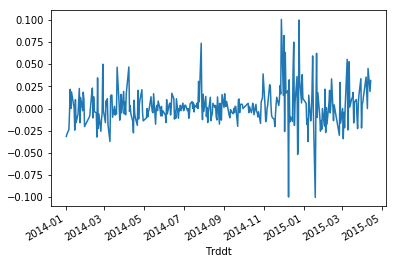

In [12]:
HXRet.plot()

In [14]:
# get the three factors
ThreeFactor=pd.read_table('ThreeFactors.txt',sep='\t',index_col='TradingDate')
ThreeFactor.index=pd.to_datetime(ThreeFactor.index)
ThreeFactor.head(n=3)

,MarkettypeID,RiskPremium1,RiskPremium2,SMB1,SMB2,HML1,HML2
TradingDate,,,,,,,
1992-01-30,P9710,0.0098,0.0068,-0.000193,-0.003945,0.001878,0.001132
1992-01-31,P9710,0.0138,0.0098,0.007597,0.006065,-0.003275,-0.002141
1992-02-01,P9710,0.0058,0.0058,0.011516,0.009544,-0.006743,-0.006776


In [16]:
# after 2014
ThrFac=ThreeFactor['2014-01-02':]
# get the factors (locations: 2, 4, 6)
ThrFac=ThrFac.iloc[:,[2,4,6]]
ThrFac.head(n=3)

,RiskPremium2,SMB2,HML2
TradingDate,,,
2014-01-02,0.000919,-0.014747,-0.019279
2014-01-03,-0.009081,-0.005061,-0.015440
2014-01-06,-0.020081,0.015898,0.009018


In [19]:
# concat these data
HXThrFac=pd.merge(pd.DataFrame(HXRet),pd.DataFrame(ThrFac),left_index=True,right_index=True)
[HXThrFac.head(n=3),HXThrFac.tail(n=3)]

[               HXRet  RiskPremium2      SMB2      HML2
 2014-01-02 -0.031505      0.000919 -0.014747 -0.019279
 2014-01-03 -0.028916     -0.009081 -0.005061 -0.015440
 2014-01-06 -0.023573     -0.020081  0.015898  0.009018,
                HXRet  RiskPremium2      SMB2      HML2
 2015-04-09  0.000000     -0.008068  0.004602 -0.008750
 2015-04-10  0.045129      0.022932 -0.010130 -0.002671
 2015-04-13  0.019191      0.023932 -0.007518  0.009513]

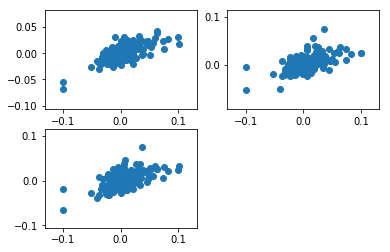

In [25]:
# scatter plot to check the correlationships
plt.subplot(2,2,1)
plt.scatter(HXThrFac.HXRet,HXThrFac.RiskPremium2)
plt.subplot(2,2,2)
plt.scatter(HXThrFac.HXRet,HXThrFac.SMB2)
plt.subplot(2,2,3)
plt.scatter(HXThrFac.HXRet,HXThrFac.HML2)

In [27]:
# multi regression / FF model
import statsmodels.api as sm
regThrFac=sm.OLS(HXThrFac.HXRet,sm.add_constant(HXThrFac.iloc[:,1:4]))
result=regThrFac.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HXRet   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     232.5
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           1.43e-78
Time:                        22:23:11   Log-Likelihood:                 929.94
No. Observations:                 310   AIC:                            -1852.
Df Residuals:                     306   BIC:                            -1837.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003      0.001      0.444      0.657      -0.001       0.002
RiskPremium2     1.0459      0.057     18.438      0.000       0.934       1.158
SMB2             0.1899      0.104      1.820      0.070      -0.015       0.395
HML2             0.5659      0.091      6.236      0.000       0.387       0.744
==============================================================================
Omnibus:                       56.500   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.229
Skew:                           0.637   Prob(JB):                     2.09e-59
Kurtosis:                       7.393   Cond. No.                         194.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
result.params

const           0.000313
RiskPremium2    1.045921
SMB2            0.189923
HML2            0.565870
dtype: float64